In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import HDBSCAN
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns

In [3]:
dataset = pd.read_csv("Processed_dataset.csv")

In [4]:
dataset.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                 1.0                                  0.0   
1                 1.0                                  0.0   
2                 1.0                                  0.0   
3                 1.0                                  0.0   
4                 1.0                                  0.0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                  0.0                      1.0                0.0   
1                  0.0                      0.0                1.0   
2                  0.0                      1.0                0.0   
3                  0.0                      0.0                1.0   
4                  0.0                      1.0                0.0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                0.0                                      0.0   
1                0.0                                      0.0   
2                0.0                                      0.0   
3                0.0                                      1.0   
4                0.0                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  
0                         0.0  
1                         1.0  
2                         1.0  
3                         0.0  
4                         0.0  

[5 rows x 41 columns]

### PCA

#### 2 Dim

In [5]:
pca = PCA(n_components=2)
dataset_2dim = pca.fit_transform(dataset)
print(f"Original shape: {dataset.shape}")
print(f"PCA transformed shape: {dataset_2dim.shape}")

Original shape: (7032, 41)
PCA transformed shape: (7032, 2)


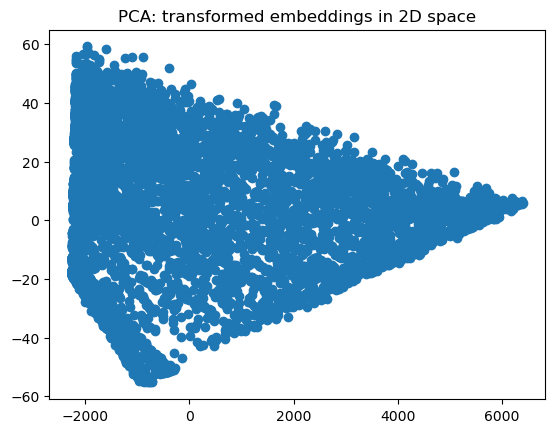

In [6]:
plt.scatter(dataset_2dim[:, 0], dataset_2dim[:, 1])
plt.title("PCA: transformed embeddings in 2D space")
plt.show()

#### 3 Dim

In [47]:
pca = PCA(n_components=3)
dataset_3dim = pca.fit_transform(dataset)
print(f"Original shape: {dataset.shape}")
print(f"PCA transformed shape: {dataset_2dim.shape}")

Original shape: (7032, 41)
PCA transformed shape: (7032, 2)


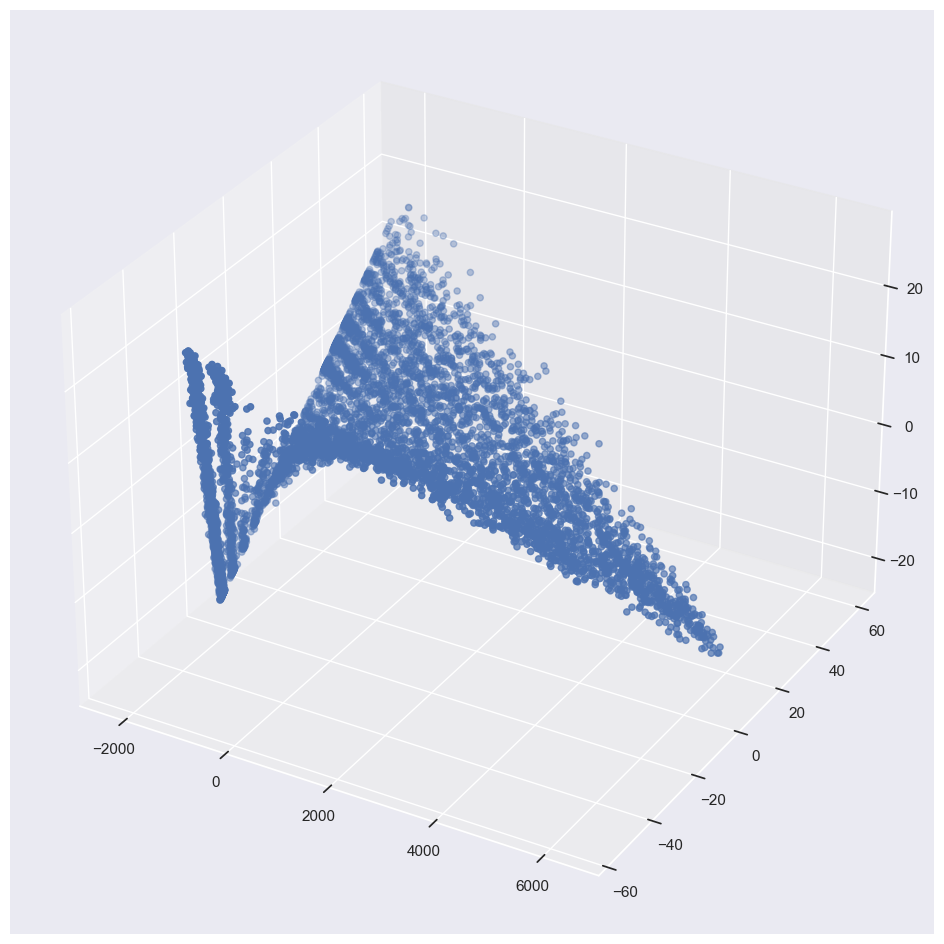

In [48]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(dataset_3dim[:,0], dataset_3dim[:,1], dataset_3dim[:,2])
plt.show()

### t-SNE

In [27]:
projection = TSNE(n_components=2).fit_transform(dataset)

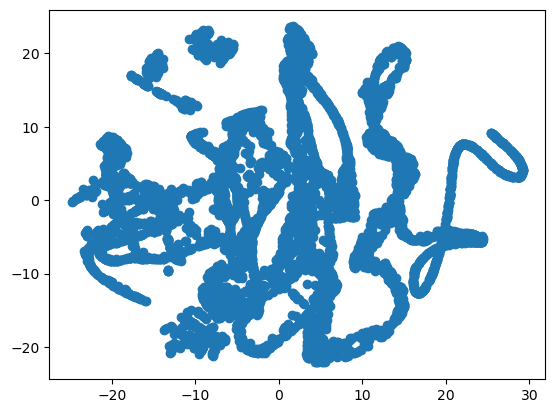

In [13]:
plt.scatter(projection[:,0], projection[:,1])

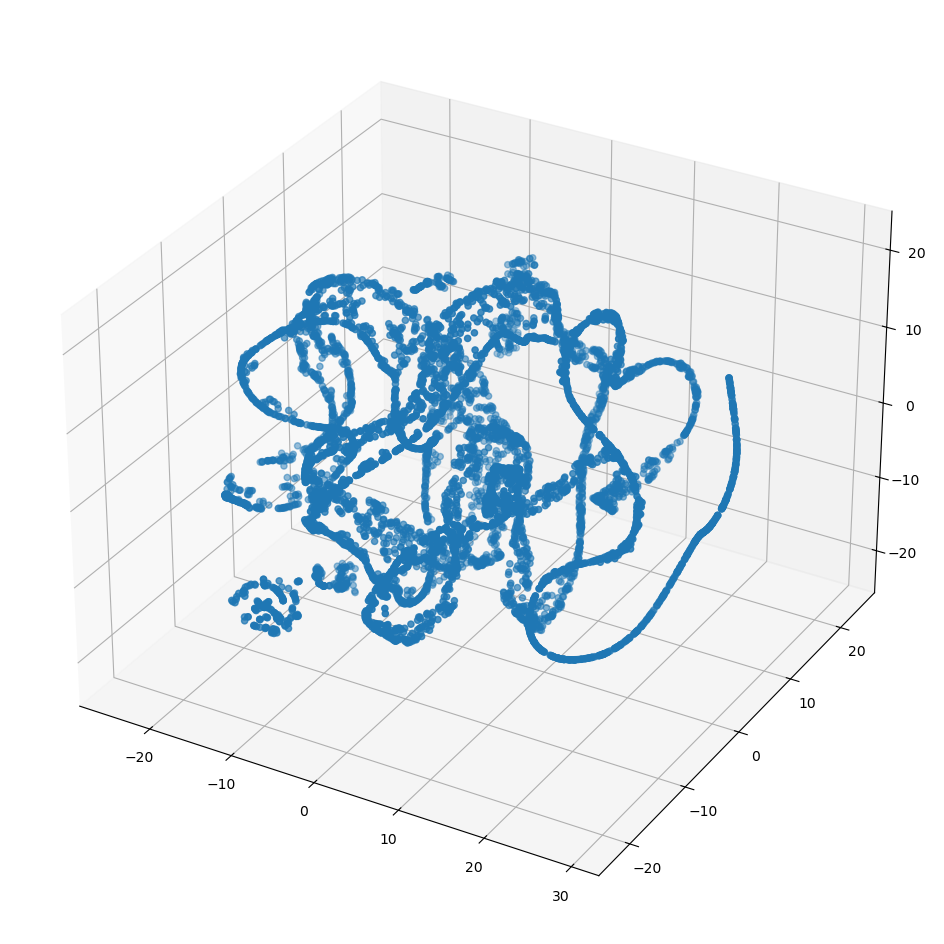

In [14]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:,0], projection[:,1], projection[:,2])
plt.show()

In [15]:
hdb = HDBSCAN(min_cluster_size=20)

In [16]:
hdb.fit(dataset)

HDBSCAN(min_cluster_size=20)

In [17]:
hdb.labels_

array([-1, -1, 47, ..., -1, 39,  5], dtype=int64)

In [18]:
cluster_sizes = list(range(4,41,2))

In [19]:
cluster_sizes

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]

In [20]:
np.unique(hdb.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53], dtype=int64)

In [21]:
unique, counts = np.unique(hdb.labels_,return_counts=True)
frequency = dict(zip(unique, counts))

In [22]:
num_of_clusters = []
num_of_outliers = []
for size in cluster_sizes:
    hdb = HDBSCAN(min_cluster_size=size)
    hdb.fit(dataset)
    unique, counts = np.unique(hdb.labels_,return_counts=True)
    frequency = dict(zip(unique, counts))
    num_of_clusters.append(len(frequency)-1)
    num_of_outliers.append(frequency.get(-1))

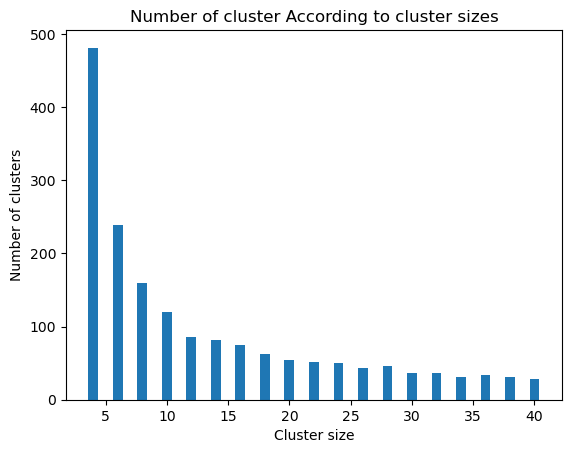

In [23]:
plt.bar(cluster_sizes,num_of_clusters)
plt.title("Number of cluster According to cluster sizes")
plt.xlabel("Cluster size")
plt.ylabel("Number of clusters")
plt.show()

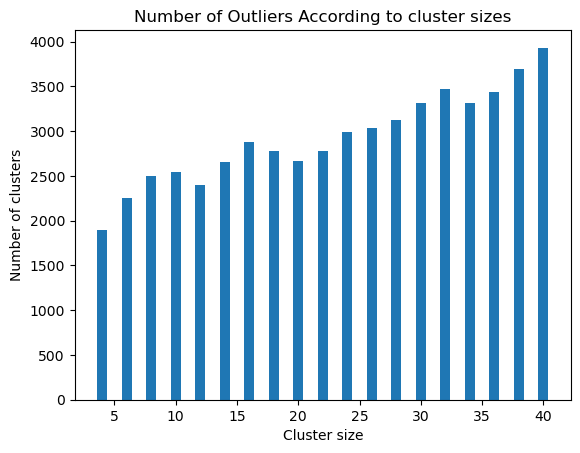

In [24]:
plt.bar(cluster_sizes,num_of_outliers)
plt.title("Number of Outliers According to cluster sizes")
plt.xlabel("Cluster size")
plt.ylabel("Number of clusters")
plt.show()

<Axes: >

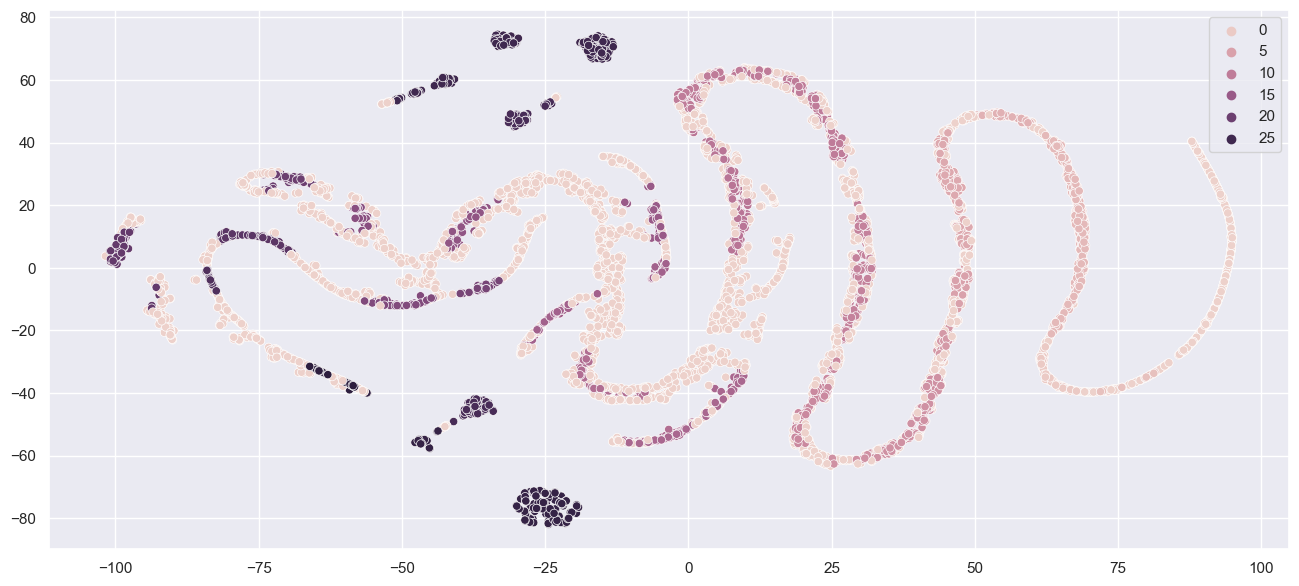

In [46]:
plt.figure(figsize=(16,7)),
sns.scatterplot(x=projection[:,0],y=projection[:,1],hue=hdb.labels_)

In [46]:
np.unique(hdb.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53], dtype=int64)

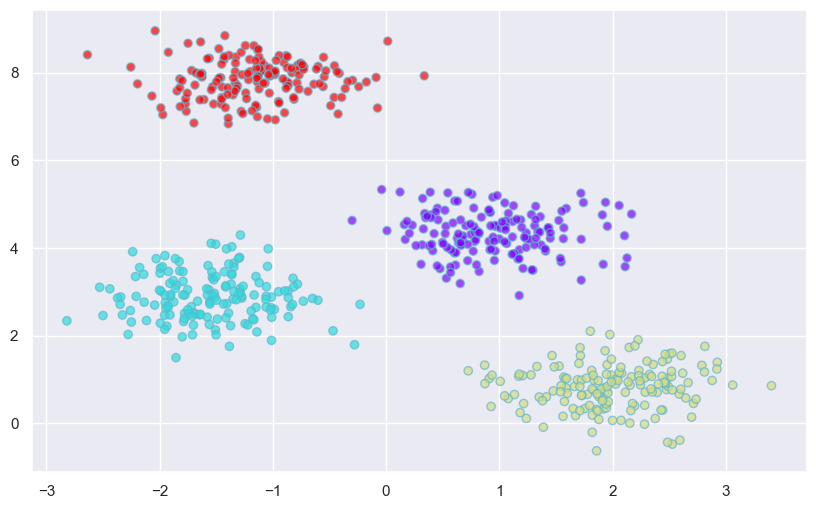

In [29]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as py
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

dataset = pd.read_csv('Processed_dataset.csv')
plt.figure(figsize=(10,6))

X, clusters = make_blobs(n_samples=630, centers=4, cluster_std=0.50, random_state=0)
brc = Birch(branching_factor=50, n_clusters=8, threshold=1.5)
brc.fit(dataset)
labels = brc.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='c')

plt.show() 

In [38]:
brc = Birch(branching_factor=50, n_clusters=8, threshold=1.5)
brc.fit(dataset)

Birch(n_clusters=8, threshold=1.5)

In [39]:
brc.labels_

array([0, 3, 0, ..., 0, 0, 2], dtype=int64)

In [40]:
labels,counts = np.unique(brc.labels_,return_counts=True)

In [41]:
labels

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [42]:
counts

array([2862,  598,  491,  795,  472,  517,  886,  411], dtype=int64)

<Axes: >

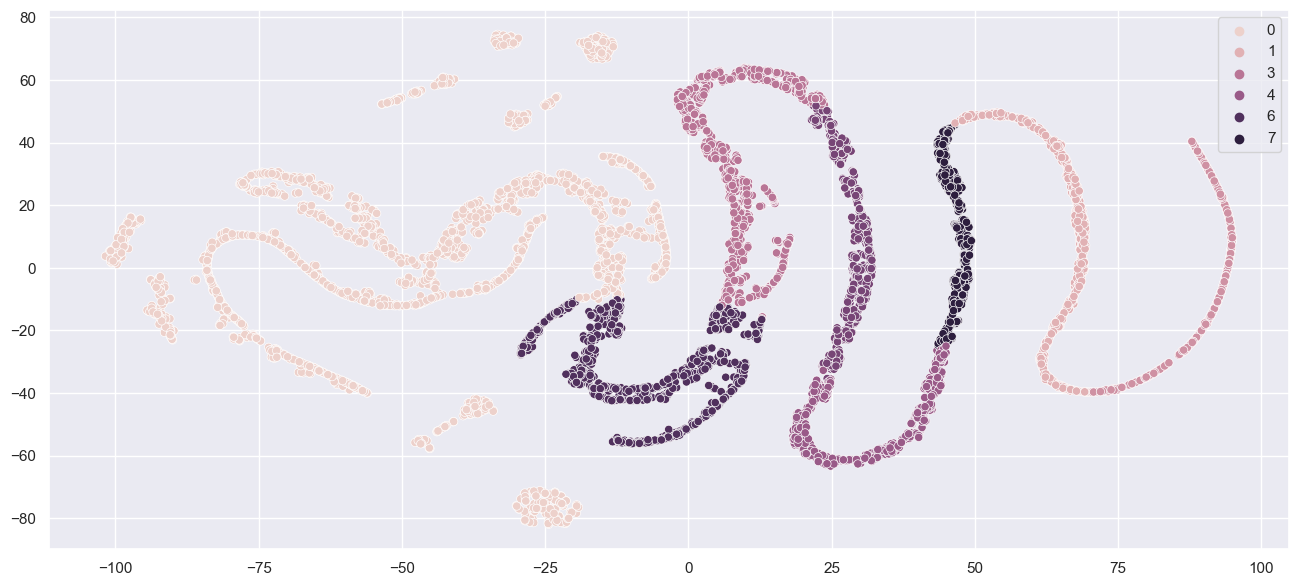

In [43]:
plt.figure(figsize=(16,7)),
sns.scatterplot(x=projection[:,0],y=projection[:,1],hue=brc.labels_)

<Axes: >

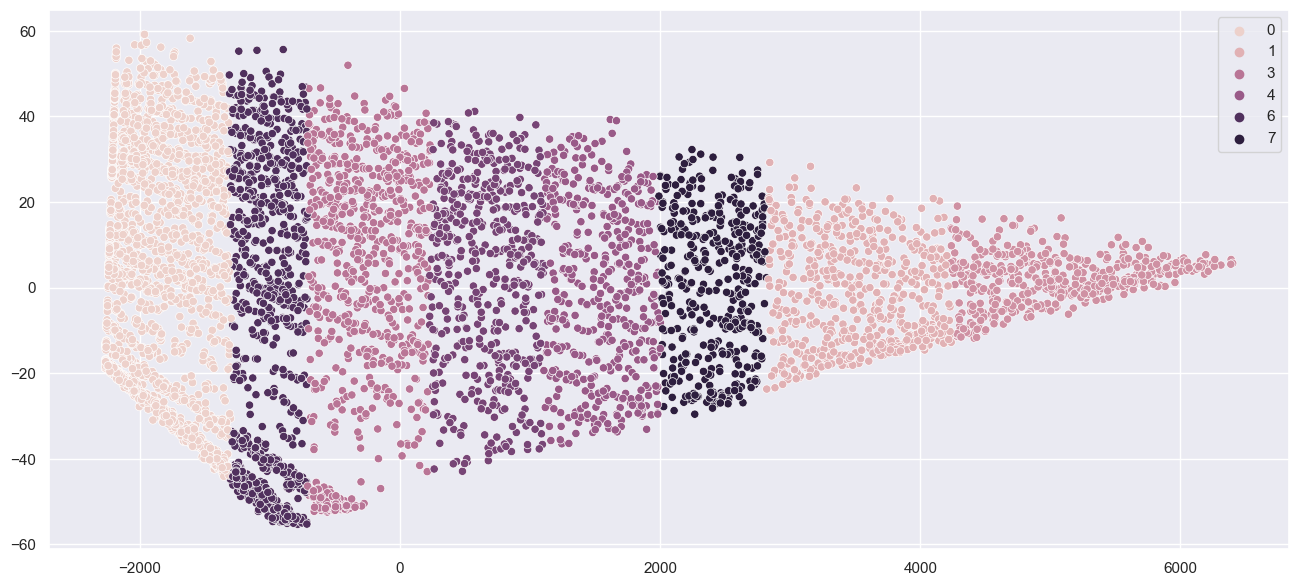

In [44]:
plt.figure(figsize=(16,7)),
sns.scatterplot(x=dataset_2dim[:,0],y=dataset_2dim[:,1],hue=brc.labels_)